<a href="https://colab.research.google.com/github/DhawalKhandait/OIBSIP/blob/main/Car_Price_Predicition_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasis Infobyte : Data Science Internship**

**Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING** 

**Name of Intern: Dhawal SUbhash Khandait**

**Batch :- March 2023**


**Loading Data and library**

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn. metrics import accuracy_score

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# load Data
data=pd.read_csv("/content/drive/MyDrive/Oasis Infobyte/Car Price Predicition with Machine Learning/CarPrice.csv")

In [36]:
# top 5 rows
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
# Last 5 rows
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [38]:
# Data set Rows & Columns count
data.shape

(205, 26)

In [39]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
# Dataset columns
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [41]:
# Dataset describe
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [42]:
# Finding null values or missing values
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [43]:
# Total duplicated data
data.duplicated().sum()

0

**Exploratory Data Analysis**

gas       185
diesel     20
Name: fueltype, dtype: int64

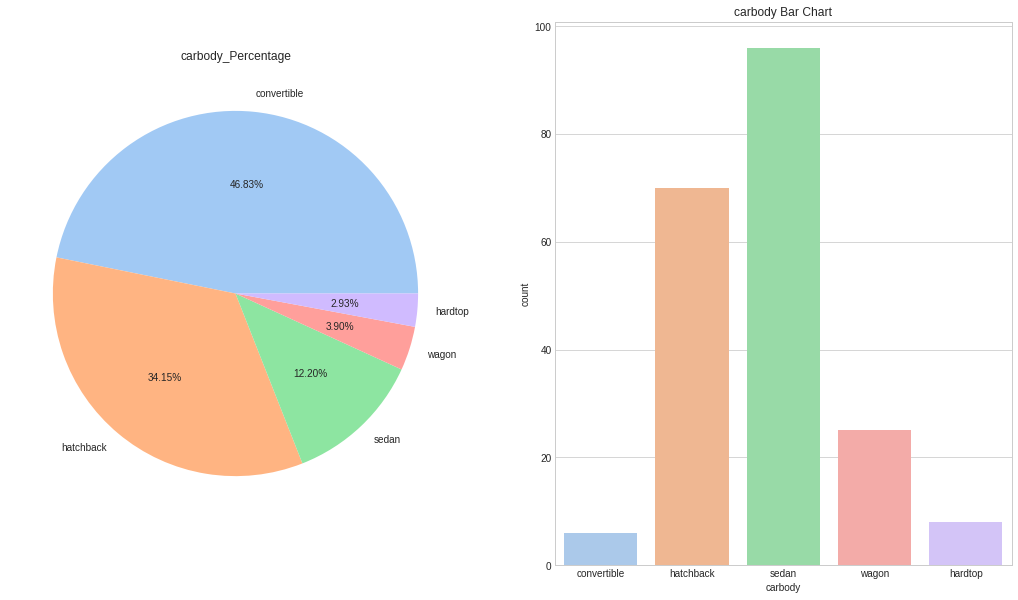

In [44]:
# Analysis Graph 1
# carbody
colors=sns.color_palette('pastel')
labels=data['carbody'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('carbody_Percentage')
plt.pie(data['carbody'].value_counts(),labels=labels,colors=colors,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.title('carbody Bar Chart')
sns.countplot(x="carbody",data=data,palette=colors)
data.fueltype.value_counts(dropna=False)

gas       185
diesel     20
Name: fueltype, dtype: int64

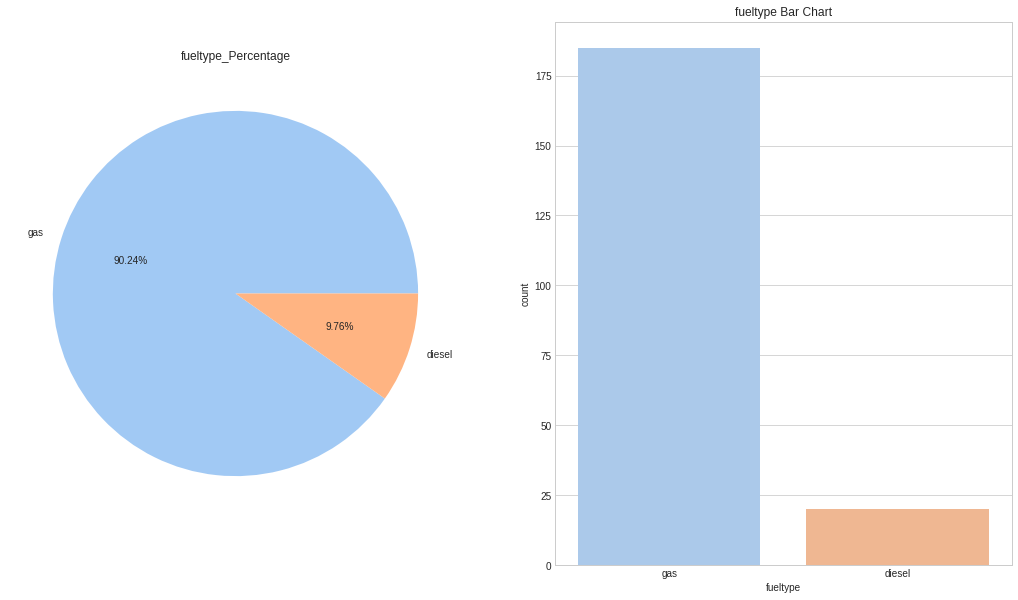

In [47]:
# Analysis Graph 2
# fueltype
colors=sns.color_palette('pastel')
labels=data['fueltype'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('fueltype_Percentage')
plt.pie(data['fueltype'].value_counts(),labels=labels,colors=colors,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.title('fueltype Bar Chart')
sns.countplot(x="fueltype",data=data,palette=colors)
data.fueltype.value_counts(dropna=False)

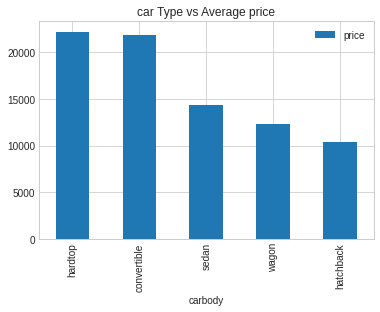

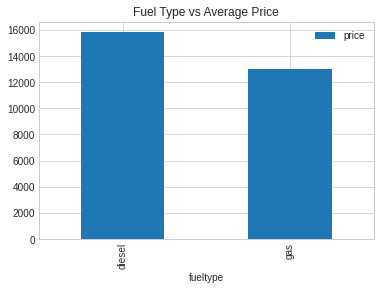

In [48]:
# Analysis Graph 3
df=pd.DataFrame(data.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('car Type vs Average price')
plt.show()
df= pd.DataFrame(data.groupby(["fueltype"])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fuel Type vs Average Price")
plt.show()

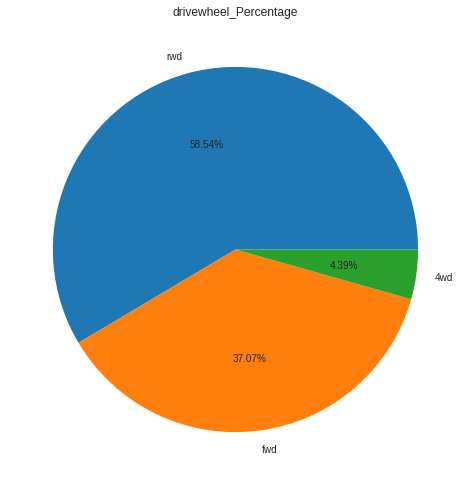

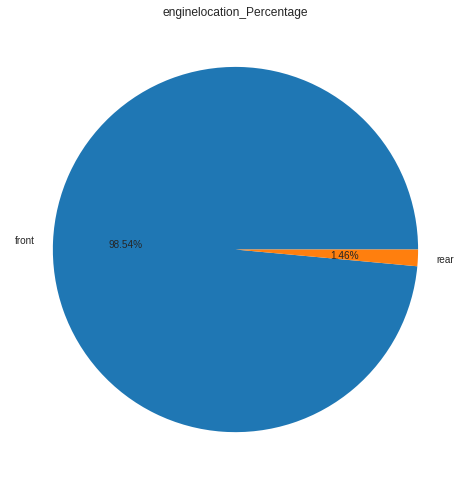

In [49]:
# Analysis Graph 4
# Region
colour=sns.color_palette('pastel')
labels=data['drivewheel'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title("drivewheel_Percentage")
plt.pie(data['drivewheel'].value_counts(),labels=labels,autopct='%.2f%%')
plt.show()



colour=sns.color_palette('pastel')
labels=data['enginelocation'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title("enginelocation_Percentage")
plt.pie(data['enginelocation'].value_counts(),labels=labels,autopct='%.2f%%')
plt.show()

<ipython-input-50-cd92db07e5b5>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


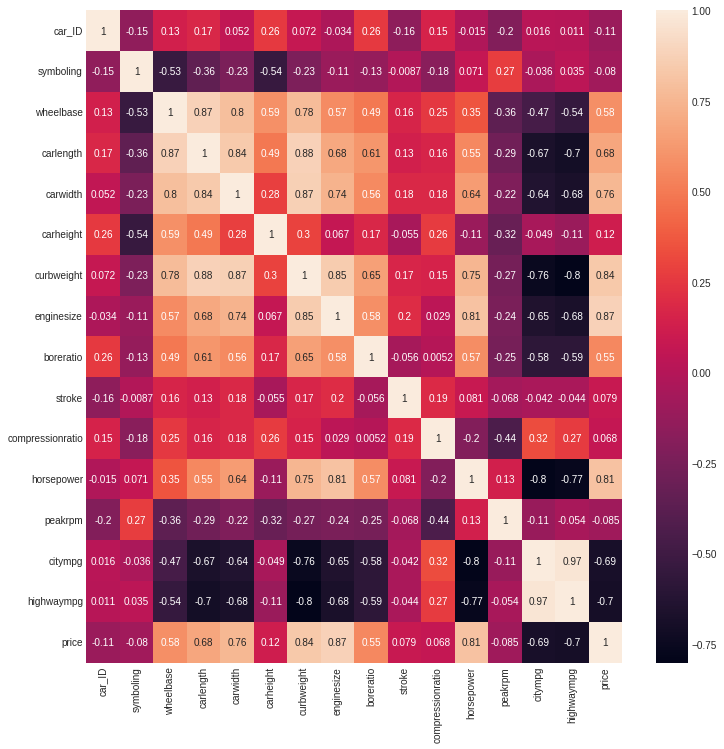

In [50]:
# Analysis Graph 5
# correlation in data
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Correlation between data
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


**Prediction on Data**

In [ ]:
predict="price"
data=data[["symboling","wheelbase","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]


In [ ]:
x=np.array(data.drop([predict],1))
y=np.array(data[predict])

<ipython-input-22-e14963156efa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(data.drop([predict],1))


In [ ]:
print(x)
print(y)

[[ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 1.000e+00  9.450e+01  6.550e+01 ...  5.000e+03  1.900e+01  2.600e+01]
 ...
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.500e+03  1.800e+01  2.300e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  4.800e+03  2.600e+01  2.700e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.400e+03  1.900e+01  2.500e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    1

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print('training data shape is:{}.'.format(x_train.shape))
print('training label shape is:{}.'.format(y_train.shape))
print('testing data shape is:{}.'.format(x_test.shape))
print('testing labelshape is:{}.'.format(y_test.shape))

training data shape is:(164, 13).
training label shape is:(164,).
testing data shape is:(41, 13).
testing labelshape is:(41,).


In [ ]:
regressor=RandomForestRegressor()


In [ ]:
regressor.fit(x,y)


RandomForestRegressor()

In [ ]:
regressor.score(x_train,y_train)


0.9882917199613878

In [ ]:
predictions= regressor. predict(x_test)


In [ ]:
percentage= regressor.score(x_test,y_test)
percentage

0.9873169256745254

In [ ]:
#check the accuracy on the training set
print(regressor.score(x_train,y_train))
print(f"Test set:{len(x_test)}")
print(f"Accuracy={percentage*100}%")

0.9882917199613878
Test set:41
Accuracy=98.73169256745254%
